In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# A校生
mu1, sigma1 = 70, 4.2
x1 = mu1 + sigma1 * np.random.randn(400)

iq_mu1,iq_sigma1 = 120,15 # 学习时间长
iq_mu2,iq_sigma2 = 60,10  # 学习时间短

tmp1 = iq_mu1 + iq_sigma1 * np.random.randn(350)
tmp2 = iq_mu2 + iq_sigma2 * np.random.randn(50)

y1 = np.append(tmp1,tmp2)

# B校生
mu2,sigma2 = 90,2.1
x2 = mu2 + sigma2 * np.random.randn(300)

tmp3 = iq_mu1 + iq_sigma1 * np.random.randn(50)
tmp4 = iq_mu2 + iq_sigma2 * np.random.randn(250)

y2 = np.append(tmp3,tmp4)

# 水平组合
dataSet1 = np.column_stack((x1,y1))
dataSet2 = np.column_stack((x2,y2))

dataSet = np.vstack((dataSet1,dataSet2))


In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
dataSet=pd.read_csv('X_data.csv',header=None)
dataSet=dataSet.values

In [29]:
dataSet.shape

(5000, 400)

In [59]:
# DBSCAN算法
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=3, min_samples=16).fit(dataSet)
db

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    min_samples=16, p=None, random_state=None)

In [60]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [61]:
core_samples_mask[db.core_sample_indices_] = True
# core_samples_mask
db.core_sample_indices_

array([ 500,  501,  502,  503,  504,  506,  507,  508,  510,  511,  512,
        513,  514,  515,  516,  517,  518,  519,  520,  522,  523,  524,
        525,  526,  527,  528,  529,  530,  532,  533,  534,  535,  536,
        537,  538,  539,  540,  541,  542,  543,  544,  545,  546,  547,
        548,  550,  551,  552,  553,  554,  555,  556,  557,  558,  559,
        560,  562,  563,  565,  566,  567,  568,  570,  571,  573,  574,
        575,  576,  577,  578,  579,  580,  581,  582,  583,  584,  585,
        586,  587,  588,  589,  590,  591,  592,  593,  594,  595,  596,
        597,  598,  599,  600,  601,  602,  604,  605,  606,  607,  608,
        609,  610,  611,  612,  613,  614,  615,  616,  617,  618,  619,
        620,  621,  622,  623,  624,  625,  626,  627,  628,  629,  630,
        631,  632,  633,  634,  635,  636,  638,  639,  640,  641,  642,
        643,  644,  645,  646,  647,  649,  651,  654,  655,  656,  658,
        660,  661,  662,  663,  664,  665,  666,  6

In [62]:
labels = db.labels_
labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [63]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_

4

In [48]:
core_samples_mask

array([ True, False, False, ..., False, False, False], dtype=bool)

C:\Users\SilentY\Anaconda3\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


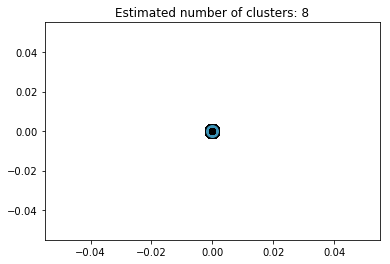

In [36]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()